# SUP ML 2 - MODEL

# Libraries

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import pickle
# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from scipy import stats 
from scipy.stats import randint as sp_randint

# Modelizacion
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import lightgbm as lgb
# Evaluacion
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer,roc_auc_score,accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_score
from sklearn import metrics
from xgboost import plot_tree
import shap
from scipy.stats import pearsonr

from sklearn.model_selection import RandomizedSearchCV

pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings("ignore")

# Carga clean data

In [171]:
df = pd.read_csv('.\\data\\df_clean.csv')

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89872 entries, 0 to 89871
Columns: 177 entries, mou to creditcd_desconocido
dtypes: bool(146), float64(26), int64(5)
memory usage: 33.8 MB


In [173]:
df.columns = df.columns.str.replace(' ', '_')

# Split X-y

In [174]:
#Dividimos el split X-y

target = 'churn'
features = df.columns[df.columns != target]

In [175]:
target

'churn'

In [176]:
X = df[features]
y = df[target]

# Distribución del target

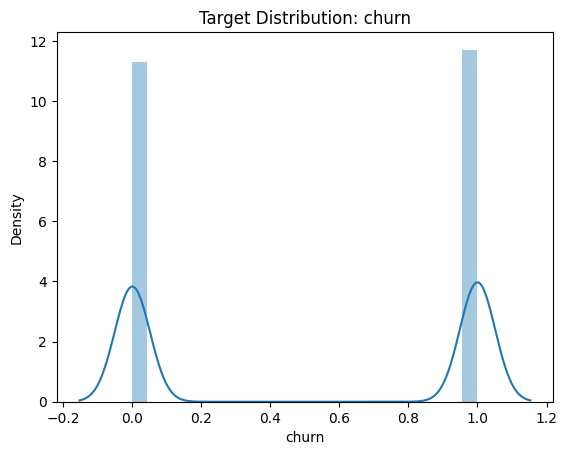

In [177]:
sns.distplot(y)
plt.title('Target Distribution: '+target)
plt.show()

# Undersampling (*)

**NOTA:** SOLO EN CLASIFICACIÓN cuando el ratio de éxitos está MUY DESBALANCEADO (<10%).

In [178]:
df["churn"].value_counts()

churn
1    45750
0    44122
Name: count, dtype: int64

# Split TRAIN-TEST

In [179]:
# Divide X-y en Train (80%) y Test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [180]:
X_train.shape

(71897, 176)

In [181]:
y_train

81484    1
37660    1
40044    1
33555    0
77134    1
        ..
6265     0
54886    1
76820    1
860      0
15795    1
Name: churn, Length: 71897, dtype: int64

In [182]:
print('Train set size:',X_train.shape[0])
print('Test set size:',X_test.shape[0])

Train set size: 71897
Test set size: 17975


# Rescaling

* NO NECESARIO en modelos de Arboles de Decisión.
* Guardar scaler en el model path.

In [183]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

X_train_std = pd.DataFrame(X_train_std, columns = X_train.columns, index= X_train.index)
X_test_std = pd.DataFrame(X_test_std, columns = X_test.columns, index= X_test.index)

In [184]:
# Comentado para no ejecutarlo cada vez que relancemos el codigo

pickle.dump(scaler, open('model\my_scaler.pkl', 'wb'))

In [185]:
#X_train_std.to_csv(".\\model\\X_train_std.csv")
#X_test_std.to_csv(".\\model\\X_test_std.csv")

# TRAIN-VALIDA

## Torneo de Modelos

* Probamos una colección de modelos con el objetivo de conseguir el mejor rendimiento del modelo en los datos de VALIDACION.

In [186]:
# Calculo del AUC de un modelo sobre un dataset (X-y). Args: modelo a validar, X, y
def auc(model,X,y):
  model.fit(X,y)
  return roc_auc_score(y,model.predict_proba(X)[:,1])  

# Calculo del AUC de un modelo sobre un dataset con Cross-Validation (X-y). Args: modelo a validar, X, y  
def auc_cross_validation(model,X,y):
  cross_val = cross_val_score(model, 
                              X, y, 
                              cv=4,                 # Numero de folds que vamos a utilizar para validar 
                              scoring='roc_auc'     # La metrica de validacion que se medira en cada train-valida
                              )    
  return cross_val.mean()

In [187]:
# Inicializa resultados
label_, auc_train_ , auc_valida_ = [], [], []

# Completa un registro en dataframe con los resultados de las funciones definidas previsamente ( AUC y AUC con cross-validation)

# Inputs: 
#   * modelo
#   * (X,y) 
#   * label especifico si queremos registrar el resultado con otro nombre (opcional)


def evaluate_classification(model, X, y, label=None):
  if label is None:
    label=str(model)
  label_.append(label)
  
  auc_train = auc(model,X,y)
  auc_valida = auc_cross_validation(model,X,y)   
  auc_train_.append(auc_train)
  auc_valida_.append(auc_valida)

  return pd.DataFrame({'Model': label_,
                      'AUC Train': auc_train_,
                      'AUC Cross-Valida': auc_valida_
                      }).sort_values('AUC Cross-Valida',ascending=False)

In [188]:
#Modelos a usar

    # LogisticRegression(),
    # AdaBoostClassifier(),
    # Ridge(),
    # RandomForestClassifier(),
    # XGBClassifier(),
    # GradientBoostingClassifier(),
    # DecisionTreeClassifier(),
    # BaggingClassifier(),
    # RandomForestClassifier()
    # LGBMClassifier()


Una vez elegido el modelo/s a usar, el resto de modelos los comentamos para agilizar la iteracion

In [189]:
#evaluate_classification(model = AdaBoostClassifier(), 
#                        X = X_train, 
#                       y = y_train)

In [190]:
#evaluate_classification(model = LogisticRegression(), 
#                        X = X_train_std, 
#                        y = y_train)

In [191]:
#evaluate_classification(model = BaggingClassifier(), X=X_train, y=y_train)

In [192]:
#evaluate_classification(model = GradientBoostingClassifier(), X=X_train, y=y_train)

In [193]:
#evaluate_classification(model = RandomForestClassifier(), X=X_train, y=y_train)

In [194]:
evaluate_classification(model = XGBClassifier(), 
                        X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
0,"XGBClassifier(base_score=None, booster=None, c...",0.822961,0.66564


In [195]:
#from sklearn.neighbors import KNeighborsClassifier
#evaluate_classification(model = KNeighborsClassifier(),
#                        X=X_train, y=y_train)

In [196]:
evaluate_classification(model = lgb.LGBMClassifier(), 
                        X=X_train, y=y_train)

[LightGBM] [Info] Number of positive: 36562, number of negative: 35335
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003940 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5319
[LightGBM] [Info] Number of data points in the train set: 71897, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508533 -> initscore=0.034135
[LightGBM] [Info] Start training from score 0.034135
[LightGBM] [Info] Number of positive: 27421, number of negative: 26501
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002996 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5264
[LightGBM] [Info] Number of data points in the train set: 53922, number of used features: 151
[LightGBM] [Info] 

,Model,AUC Train,AUC Cross-Valida
1,LGBMClassifier(),0.737635,0.676493
0,"XGBClassifier(base_score=None, booster=None, c...",0.822961,0.665640


USAREMOS LGBM YA QUE ES EL QUE MAYOR AUC NOS HA DADO EN VALIDACIÓN Y EL QUE A SU VEZ MAS SE APROXIMA AL ENTRENAMIENTO

* Utilizar RandomSearch para probar diferentes configuraciones de los parametros del modelo ganador en el torneo de modelos con el objetivo de mejorar el control del overfitting.

In [197]:
parametros_hp = {
    'num_leaves': sp_randint(6, 50),
    'min_child_samples': sp_randint(10, 50),
    'min_child_weight': [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10],
    'reg_lambda': [0, 1e-1, 1, 5, 10, 20]
}

In [198]:
search_hp = RandomizedSearchCV(estimator = lgb.LGBMClassifier(), 
                               param_distributions = parametros_hp,
                               scoring = 'roc_auc',                         # metrica a optimizar: AUC
                               cv = 4,                                      # numero de folds para cross-validation
                               n_iter = 100,                                 # numero de iteraciones, cada una testeara una configuracion distinta
                               n_jobs=-1, 
                               verbose=True)

In [199]:
search_hp.fit(X_train, y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[LightGBM] [Info] Number of positive: 36562, number of negative: 35335
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003492 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5319
[LightGBM] [Info] Number of data points in the train set: 71897, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508533 -> initscore=0.034135
[LightGBM] [Info] Start training from score 0.034135


RandomizedSearchCV(cv=4, estimator=LGBMClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'min_child_samples': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000023532A3EC90>,
                                        'min_child_weight': [0.001, 0.01, 0.1,
                                                             1, 10.0, 100.0,
                                                             1000.0],
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000235208A3E90>,
                                        'reg_alpha': [0, 0.1, 1, 2, 5, 7, 10],
                                        'reg_lambda': [0, 0.1, 1, 5, 10, 20],
                                        'subsample': [0.8, 0.9, 1.0]},
                   scoring='roc_auc', verbose=True)

In [200]:
print("---- Results from Random Search -----")
print("\n The best estimator across ALL searched params:", search_hp.best_estimator_)
print("\n The best AUC:", search_hp.best_score_)
print("\n The best parameters across ALL searched params:\n", search_hp.best_params_)

---- Results from Random Search -----

 The best estimator across ALL searched params: LGBMClassifier(colsample_bytree=0.8, min_child_samples=19,
               min_child_weight=100.0, num_leaves=45, reg_alpha=1,
               reg_lambda=10)

 The best AUC: 0.6811947697624778

 The best parameters across ALL searched params:
 {'colsample_bytree': 0.8, 'min_child_samples': 19, 'min_child_weight': 100.0, 'num_leaves': 45, 'reg_alpha': 1, 'reg_lambda': 10, 'subsample': 1.0}


## Modelo final

* Entrenar el modelo final con el algoritmo y los parametros que hanfuncionado mejor en anteriores experimentos.
* Argumentar la elección.
* Guardar el modelo en model path.

In [201]:
best_model = search_hp.best_estimator_

In [202]:
print('AUC Train:', auc(best_model, X_train, y_train))

[LightGBM] [Info] Number of positive: 36562, number of negative: 35335
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003990 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5319
[LightGBM] [Info] Number of data points in the train set: 71897, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508533 -> initscore=0.034135
[LightGBM] [Info] Start training from score 0.034135


AUC Train: 0.7437158280918188


In [203]:
print('AUC CV:', auc_cross_validation(best_model, X_train, y_train))

[LightGBM] [Info] Number of positive: 27421, number of negative: 26501


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009430 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5264
[LightGBM] [Info] Number of data points in the train set: 53922, number of used features: 151
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508531 -> initscore=0.034127
[LightGBM] [Info] Start training from score 0.034127
[LightGBM] [Info] Number of positive: 27421, number of negative: 26502
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002970 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5266
[LightGBM] [Info] Number of data points in the train set: 53923, number of used features: 151
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508521 -> initscore=0.034089
[LightGBM] [Info] Start training from score 0.034089
[LightGBM] [Info] Nu

In [204]:
y_train_pred = best_model.predict(X_train)              # predicciones del modelo en los datos de TRAIN
y_test_pred = best_model.predict(X_test)                # predicciones del modelo en los datos de TEST

In [205]:
#Igual que con el Scaler, lo comentamos para que no lo este generando de nuevo cada vez

pickle.dump(best_model, open('model\my_model.pkl', 'wb'))

# TEST

* Evaluación de las métricas de performance en TEST.

In [206]:
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred)
matriz_confusion = confusion_matrix(y_test, y_test_pred)

In [207]:
# Crear un diccionario con los nombres de las métricas y sus valores
metricas_dict = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC AUC': roc_auc
}

# Imprimir las métricas
for nombre_metrica, valor_metrica in metricas_dict.items():
    print(f'{nombre_metrica}: {valor_metrica:.4f}')

# Imprimir la matriz de confusión
print('\nMatriz de Confusión:')
print(matriz_confusion)

Accuracy: 0.6290
Precision: 0.6323
Recall: 0.6552
F1 Score: 0.6435
ROC AUC: 0.6284

Matriz de Confusión:
[[5286 3501]
 [3168 6020]]


AUC Train: 0.7437
AUC Test: 0.6809


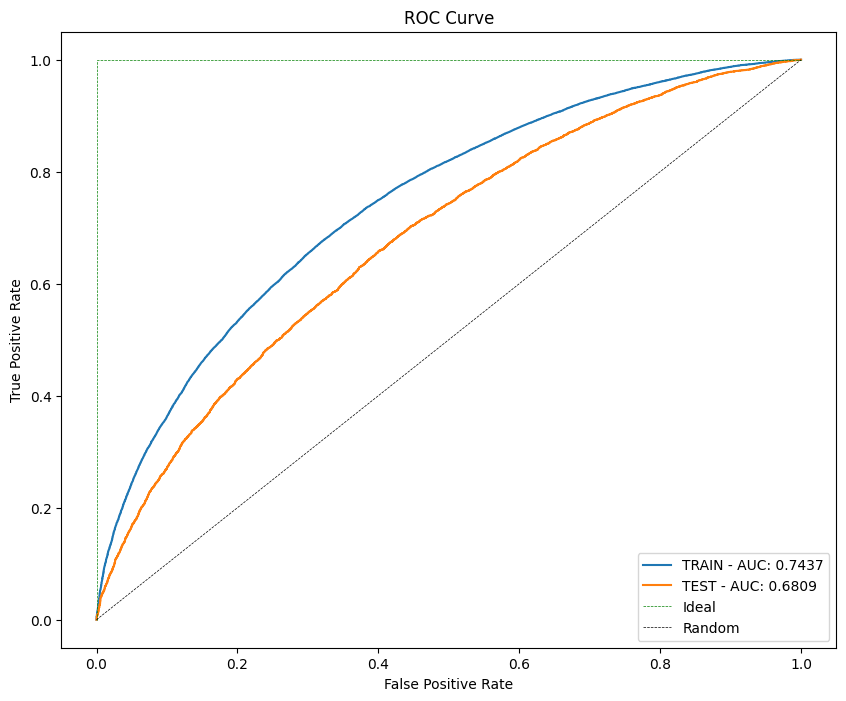

Accuracy: 0.629
Precision: 0.6323
Recall: 0.6552
F1-score: 0.6435


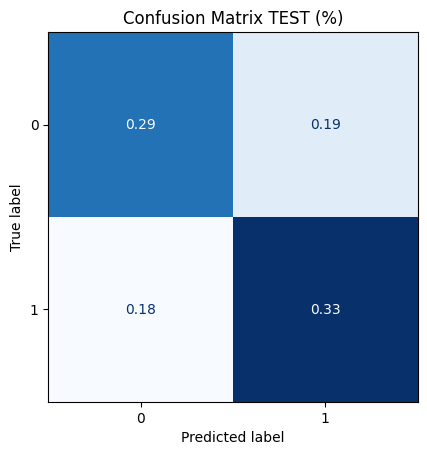

In [208]:
y_train_pred = best_model.predict(X_train)              # predicciones del modelo en los datos de TRAIN
y_test_pred = best_model.predict(X_test)                # predicciones del modelo en los datos de TEST
y_train_pred_proba = best_model.predict_proba(X_train)[:, 1]      # probabilidad de éxito (1) segun el modelo en los datos de TRAIN
y_test_pred_proba = best_model.predict_proba(X_test)[:, 1]        # probabilidad de éxito (1) segun el modelo en los datos de TEST
######## AUC #########
from sklearn.metrics import roc_auc_score
auc_train = roc_auc_score(y_train, y_train_pred_proba)      # AUC en TRAIN
auc_test = roc_auc_score(y_test, y_test_pred_proba)         # AUC en TEST
print('AUC Train:', round(auc_train,4))
print('AUC Test:', round(auc_test,4))
########## ROC CURVE #########
from sklearn.metrics import roc_curve
# metrics for ROC
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)
#Plot
plt.figure(figsize=[10,8])
plt.plot(fpr_train, tpr_train, label='TRAIN - AUC: {:.4f}'.format(auc_train))
plt.plot(fpr_test, tpr_test, label='TEST - AUC: {:.4f}'.format(auc_test))
plt.title('ROC Curve')
plt.plot([0,0,1],[0,1,1], color='green', linestyle='--', linewidth=0.5, label='Ideal')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', linewidth=0.5, label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()
########## CONFUSION MATRIX ##########
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_test = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_test/len(y_test)).plot(colorbar = False, cmap = 'Blues')
plt.title('Confusion Matrix TEST (%)')
plt.plot()
########## Accuracy, Precision, Recall y F1-Score ##########
cm_test
TN = cm_test[0,0]
TP = cm_test[1,1]
FP = cm_test[0,1]
FN = cm_test[1,0]
total = len(y_test)
# Rellenar
accuracy_test = (TN+TP)/total
precision_test = TP/(TP+FP)
recall_test = TP/(TP+FN)
f1_test = 2/(1/recall_test + 1/precision_test)
print('Accuracy:',round(accuracy_test,4))
print('Precision:',round(precision_test,4))
print('Recall:',round(recall_test,4))
print('F1-score:',round(f1_test,4))

# INTERPRETABILITY

* Analizamos top features del modelo y su peso en el modelo.
* Plotear SHAP values y el impacto positivo/negativo.
* Comentar las top5 features, su impacto en el target y extraer insights.
* Analisis complementarios:
  * Modelos de arboles: Feature Importances, plot de arbol de decision.
  * Modelos lineales: Coeficentes y formula del modelo.

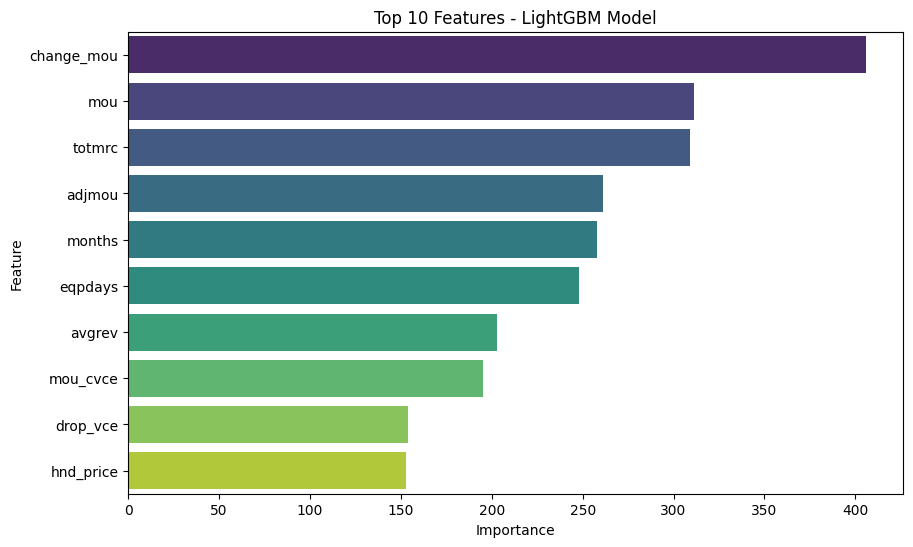

In [209]:
# Obtener las importancias de las características
feature_importance = best_model.feature_importances_

# Obtener nombres de las características
feature_names = best_model.feature_name_

# Crear un DataFrame para facilitar la manipulación de datos
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Obtener las "top features" (por ejemplo, las 10 principales)
top_features = feature_importance_df.head(10)

# Visualizar las top features en un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title('Top 10 Features - LightGBM Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Las 5 top features son mou, change_mou , change_rev , totmrc , eqpdays

    - mou : Numero medio de minutos mensuales de uso
    - change_mou : Cambio porcentual de uso de los ultimos tres meses
    - change_rev : Cambio porcentual en los ingresos mensuales respecto a los ultimos tres meses
    - totmrc : Media total de cargas recurrente mensual
    - eqpdays : Numero de dias del equipo actual

Tanto mou como change_mou indican el uso y el cambio respectivo que hacen del servicio, por tanto, a mayor uso es menos probable que se vayan y a menor uso, al reves. \
eqpdays indica el envejecimiento del equipo en uso, cuanto más viejo, es mas probable que se vayan (por ejemplo otra empresa le ofrece un equipo nuevo). \
El cambio de los ingresos, va relacionado con el uso del equipo y del servicio, cuanto menos se obtiene de dicho cliente, menos esta usando el servicio y mas probable es que se marche. \
La media de cargas también va directamente relacionado con el uso del servicio.\

En general, a menor uso, menos ingresos, mayor correlación de que el cliente se marche (churn = 0)

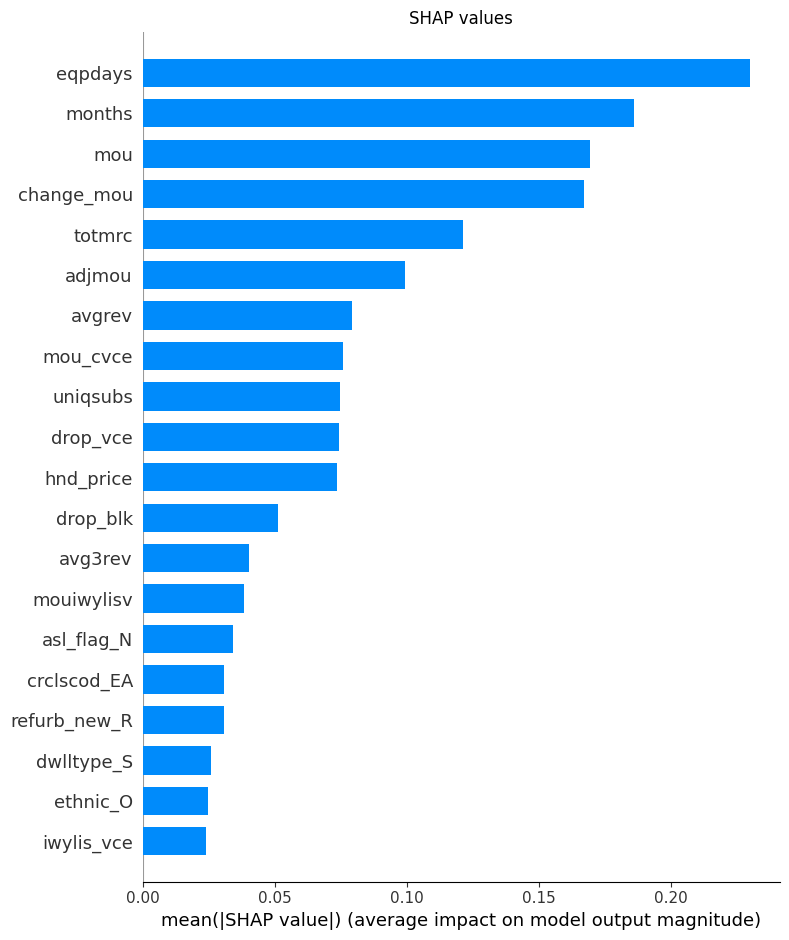

In [210]:
#SHAP value: peso en el output final
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)
plt.title('SHAP values')
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=20)

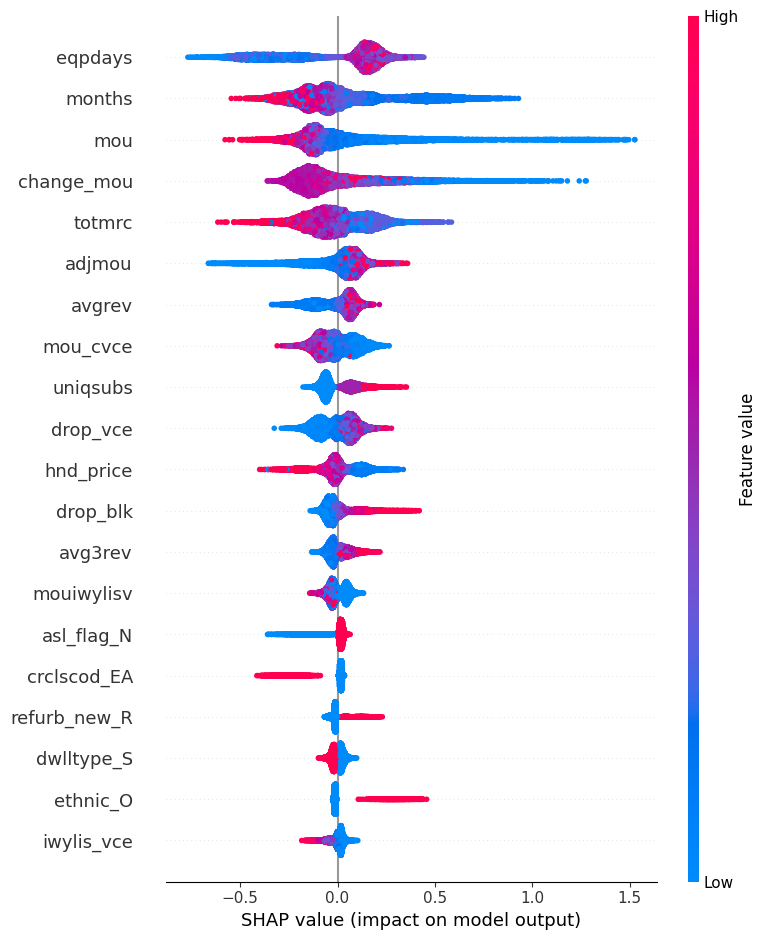

In [211]:
shap.summary_plot(shap_values, X_test)